# Tutorial

ANEMO allows you to perform Fits on data of Smooth Pursuite Eyes Movements. You could use the functions ``‘velocity’``, ``‘position’`` and ``‘saccades’`` already present, but also your own functions.

It must be initialized with the parameters of the experiment :

## import ANEMO

### The parameters of the experiment

In [1]:
import numpy as np

screen_width_px = 1280 # px
screen_width_cm = 36   # cm
viewingDistance = 57.  # cm

tan = np.arctan((screen_width_cm/2)/viewingDistance)
screen_width_deg = 2. * tan * 180/np.pi
px_per_deg = screen_width_px / screen_width_deg

param_exp = {# OBLIGATORY :
                # - number of trials per block :
                      'N_trials' : 2,
                # - number of blocks :
                      'N_blocks' : 2,
                # - direction of the target :
                    # list of lists for each block containing the direction of
                    # the target for each trial is to -1 for left 1 for right
                      'dir_target' : [[-1, 1], [1, -1]],
                # - number of px per degree for the experiment :
                      'px_per_deg' : px_per_deg,
             # OPTIONAL :
                # - subject name :
                      'observer' : 'test',
                # - list of the names of the events of the trial :
                      'list_events' : ['StimulusOn\n', 'StimulusOff\n',
                                      'TargetOn\n', 'TargetOff\n'],
                # - target velocity in deg/s :
                      'V_X_deg' : 15,
                # - presentation time of the target :
                      'stim_tau' : 0.75,
                # - the time the target has to arrive at the center of the screen in ms,
                    # to move the target back to t=0 of its RashBass = velocity*latency
                     'RashBass' : 100, 
              }

In [2]:
from ANEMO import ANEMO
A = ANEMO(param_exp)

## Retrieving the data

In [3]:
from ANEMO import read_edf

# path to the file that has to be read
datafile = 'name_data_file.asc'

data = read_edf(datafile, start='TRIALID')

# for the demo we need only the first four trials
data = data[:4]

## arg

In [4]:
# number of the block and trial
block, trial  = 1, 0

# number of the trial
trial_data = trial + param_exp['N_trials']*block

In [5]:
arg = A.arg(data_trial=data[trial_data], trial=trial, block=block)

In [6]:
arg

{'StimulusOf': 880031,
 'StimulusOn': 879399,
 'TargetOff': 881113,
 'TargetOn': 880331,
 'data_x': array([ 666.7,  666.8,  666.9, ..., 1086.3, 1086.1, 1086. ]),
 'data_y': array([500.2, 499.8, 499.7, ..., 516.4, 516.7, 516.9]),
 'dir_target': 1,
 'px_per_deg': 36.51807384230632,
 'saccades': [[879579, 879597, 19, 665.6, 503.5, 647.7, 506.7],
  [880527, 880550, 24, 672.9, 504.2, 733.2, 507.2],
  [880682, 880704, 23, 783.2, 502.4, 862.6, 499.5]],
 't_0': 879350,
 'trackertime': array([879350, 879351, 879352, ..., 881212, 881213, 881214])}

In [7]:
print('the number of px per degree is : ', arg.px_per_deg, '\n',
      'the direction of the target for the trial is : ', arg.dir_target,
      sep='')

the number of px per degree is : 36.51807384230632
the direction of the target for the trial is : 1


**the timings of the trial :**

In [8]:
print('the time of StimulusOn is : ', arg.StimulusOn, '\n',
      'the time of StimulusOf is : ', arg.StimulusOf, '\n',
      'the time of TargetOn is : ', arg.TargetOn, '\n',
      'the time of TargetOff is : ', arg.TargetOff, '\n',
      'the time of the beginning of the trial is : ', arg.t_0, '\n',
      'the time of the trial is : ', arg.trackertime,
      sep='')

the time of StimulusOn is : 879399
the time of StimulusOf is : 880031
the time of TargetOn is : 880331
the time of TargetOff is : 881113
the time of the beginning of the trial is : 879350
the time of the trial is : [879350 879351 879352 ... 881212 881213 881214]


**the position of the eye on the screen in px during the trial :**

In [9]:
print('the horizontal position is : ', arg.data_x, '\n',
      'the vertical position is : ', arg.data_y,
      sep='')

the horizontal position is : [ 666.7  666.8  666.9 ... 1086.3 1086.1 1086. ]
the vertical position is : [500.2 499.8 499.7 ... 516.4 516.7 516.9]


**the saccade parameter is :** list of lists, each containing ``[start_saccade, end_saccade, duration_saccade, startx_saccade, starty_saccade, endx_saccade, endy_saccade]``

In [10]:
print('the saccade of the trial is : ', arg.saccades, '\n\n',
      'the first saccade begins at time : ', arg.saccades[0][0], '\n',
      'the first saccade ends in time : ', arg.saccades[0][1], '\n',
      'the first saccade has a duration : ', arg.saccades[0][2], '\n',
      'the first saccade begins at the horizontal position : ', arg.saccades[0][3], '\n',
      'the first saccade begins at the vertical position : ', arg.saccades[0][4], '\n',
      'the first saccade ends at the horizontal position : ', arg.saccades[0][5], '\n',
      'the first saccade ends at the vertical position : ', arg.saccades[0][6], '\n',
      sep='')

the saccade of the trial is : [[879579, 879597, 19, 665.6, 503.5, 647.7, 506.7], [880527, 880550, 24, 672.9, 504.2, 733.2, 507.2], [880682, 880704, 23, 783.2, 502.4, 862.6, 499.5]]

the first saccade begins at time : 879579
the first saccade ends in time : 879597
the first saccade has a duration : 19
the first saccade begins at the horizontal position : 665.6
the first saccade begins at the vertical position : 503.5
the first saccade ends at the horizontal position : 647.7
the first saccade ends at the vertical position : 506.7



## Data

ANEMO allows you to perform Fits on different data. You could use the data of **velocity**, **position** and **saccades**.

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from ANEMO import ANEMO
Plot = ANEMO.Plot(param_exp)

### Raw Data

In [13]:
def demo_plot_data(show) :
    
    #--------------------------------------------
    # Plot_data
    #--------------------------------------------
    print('fct Plot_data\n', '-'*44, sep='')
    
    fig, axs = Plot.plot_data(data=data, show=show, trials=trial, block=block)
    plt.show()

    #--------------------------------------------
    # Plot_Full_data
    #--------------------------------------------
    print('fct Plot_Full_data\n', '-'*44, sep='')
    
    file_path='_static/result/'+show
    Plot.plot_Full_data(data=data, show=show, N_blocks=param_exp['N_blocks'], N_trials=param_exp['N_trials'], file_fig=file_path)

    print('\n')

    for b in range(param_exp['N_blocks']) :
        print('figure data saved in %s_%s for block %s'%(file_path, b+1, b+1))

**velocity**

In [14]:
velocity_deg = A.velocity_deg(arg.data_x)

In [15]:
velocity_NAN = A.velocity_NAN(arg.data_x, arg.data_y, arg.saccades,
                              arg.trackertime, arg.TargetOn)

fct Plot_data
--------------------------------------------


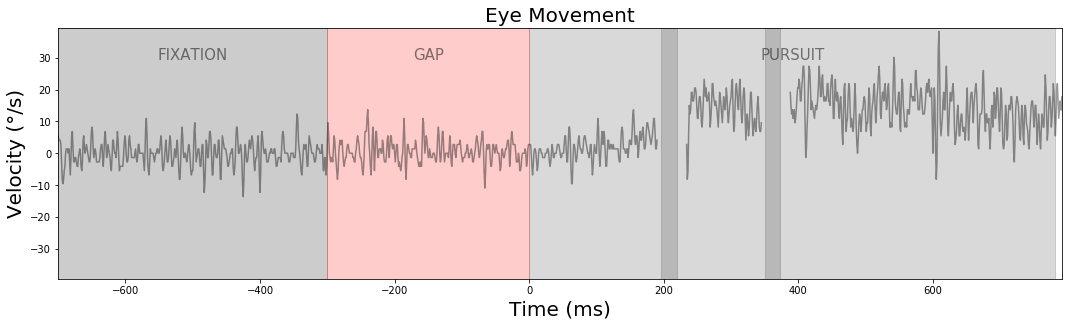

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/velocity_1 for block 1
figure data saved in _static/result/velocity_2 for block 2


In [16]:
demo_plot_data('velocity')

**position**

fct Plot_data
--------------------------------------------


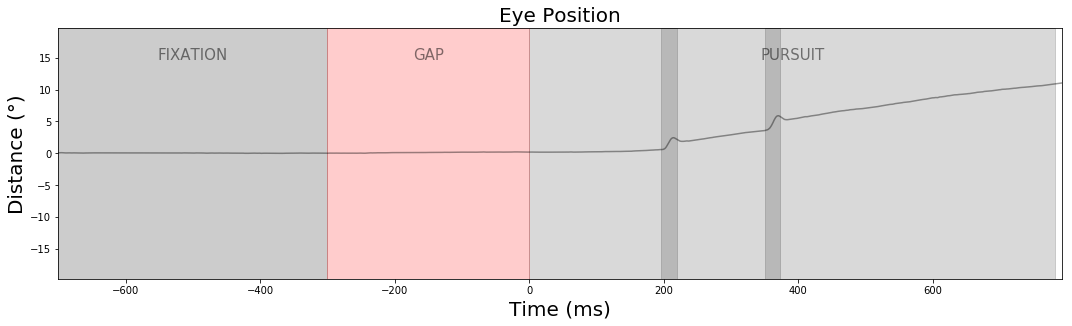

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/position_1 for block 1
figure data saved in _static/result/position_2 for block 2


In [17]:
demo_plot_data('position')

**saccade**

fct Plot_data
--------------------------------------------


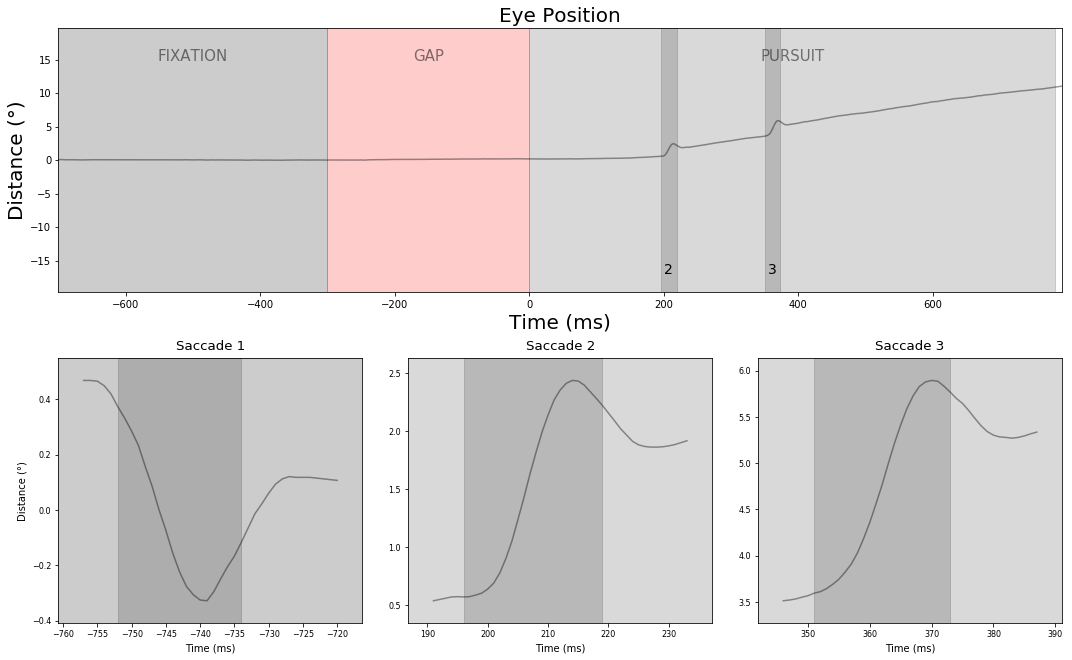

fct Plot_Full_data
--------------------------------------------
block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1


figure data saved in _static/result/saccade_1 for block 1
figure data saved in _static/result/saccade_2 for block 2


In [18]:
demo_plot_data('saccade')

### Filter

the filt option allows you to apply a low-pass filter on the data,

filt can be:

- ``'position'``: filter the position,
- ``'velocity'``: filter the speed,
- ``'velocity-position'``: filter the position then the speed
- ``None``: the data will not be filtered

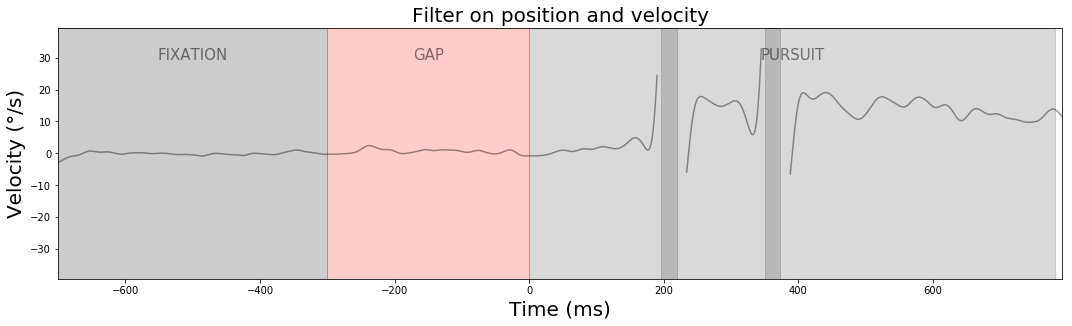

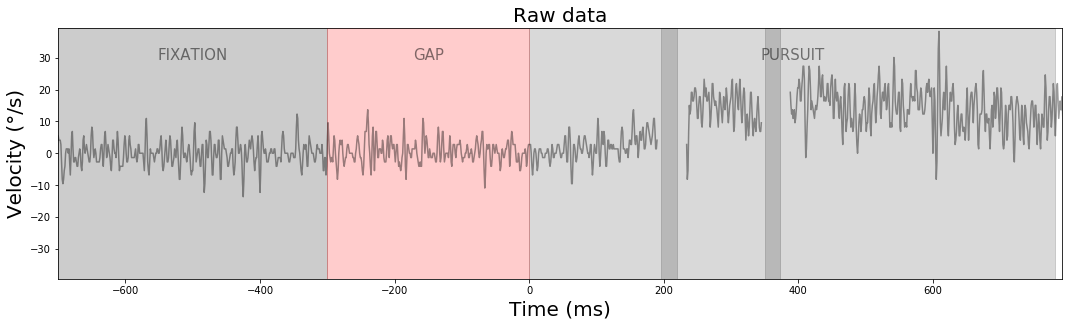

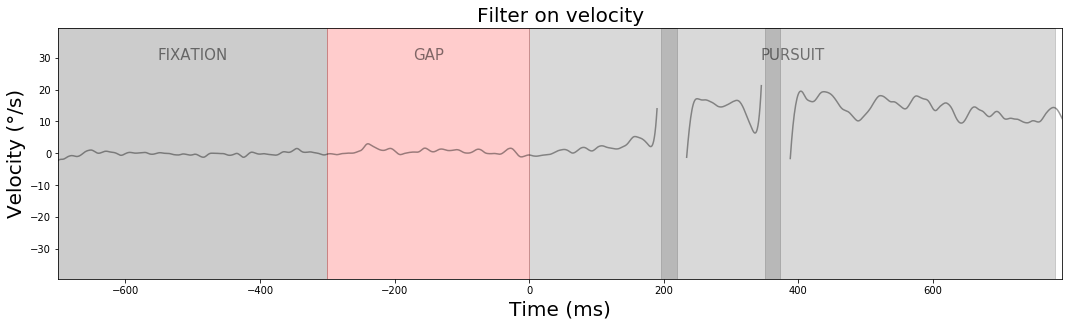

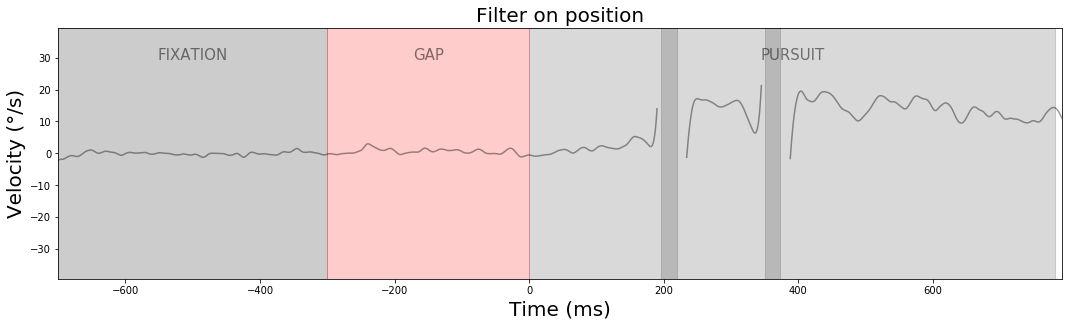

In [19]:
#--------------------------------------------
# Plot_filt_data
#--------------------------------------------
filts = {None:'Raw data',
         'position':'Filter on position',
         'velocity':'Filter on velocity',
         'velocity-position':'Filter on position and velocity'}

show = 'velocity' # can be 'velocity', 'position' or 'saccade'


for filt, title in filts.items() :
    fig, axs = Plot.plot_data(data=data, show=show, trials=trial, block=block,
                              filt=filt, cutoff=30, sample_rate=1000,
                              title=title)

## Classical Methode

In [20]:
classical_lat = A.classical_method.latency(velocity_NAN)
classical_max = A.classical_method.maximum(velocity_NAN, arg.TargetOn)
classical_anti = A.classical_method.anticipation(velocity_NAN, arg.TargetOn)

# or
#classical_lat, classical_anti, classical_max = A.classical_method.Full(velocity_NAN, arg.TargetOn)

/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:661: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/ANEMO-0.0.1-py3.5.egg/ANEMO/ANEMO.py:682: RuntimeWarning: Mean of empty slice


In [21]:
print(classical_lat, classical_anti, classical_max)

nan nan nan


## Equation

**velocity**

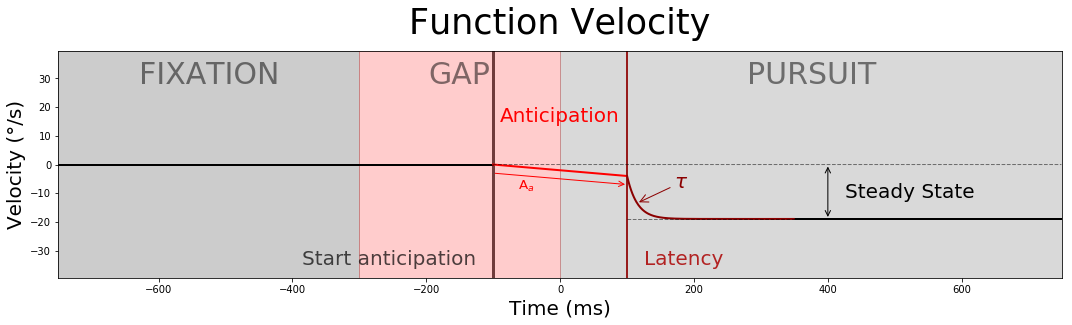

In [22]:
fig, axs = Plot.plot_equation(equation='fct_velocity')

**position**

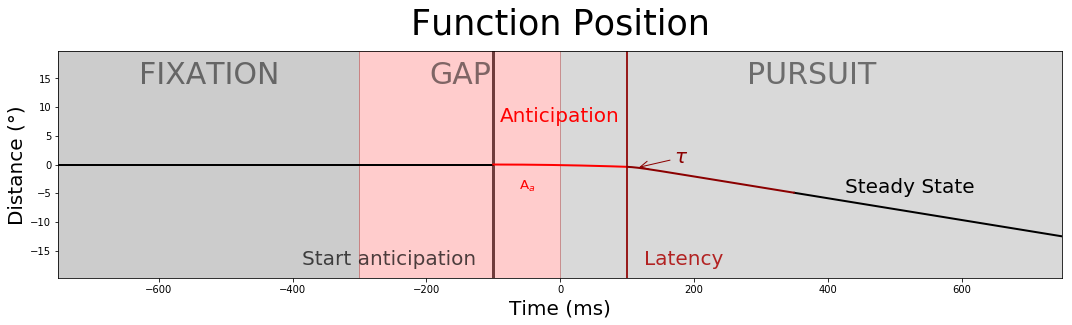

In [23]:
fig, axs = Plot.plot_equation(equation='fct_position')

**saccade**

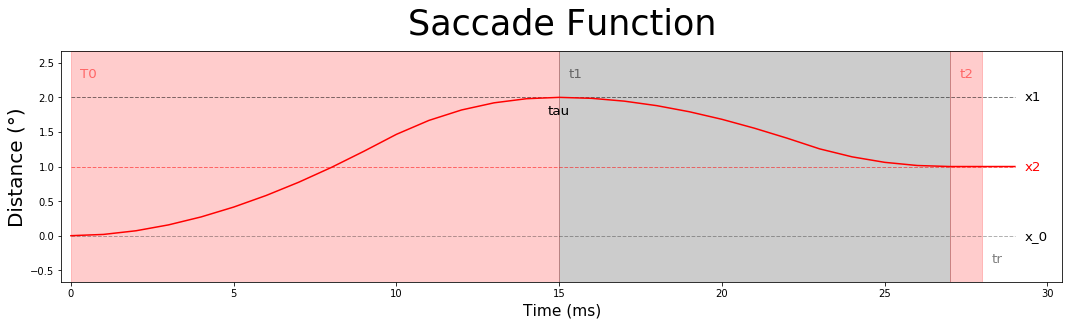

In [24]:
fig, axs = Plot.plot_equation(equation='fct_saccade')

## Fit

In [25]:
Fit = ANEMO.Fit(param_exp)

### generation-param-fit

In [26]:
param_fit = Fit.generation_param_fit(equation='fct_velocity', data_x=data[0]['x'],
                                     dir_target=arg.dir_target, trackertime=arg.trackertime,
                                     TargetOn=arg.TargetOn, StimulusOf=arg.StimulusOf, saccades=arg.saccades,
                                     value_latency=None, value_maxi=None, value_anti=None, before_sacc=5, after_sacc=15)

**velocity**

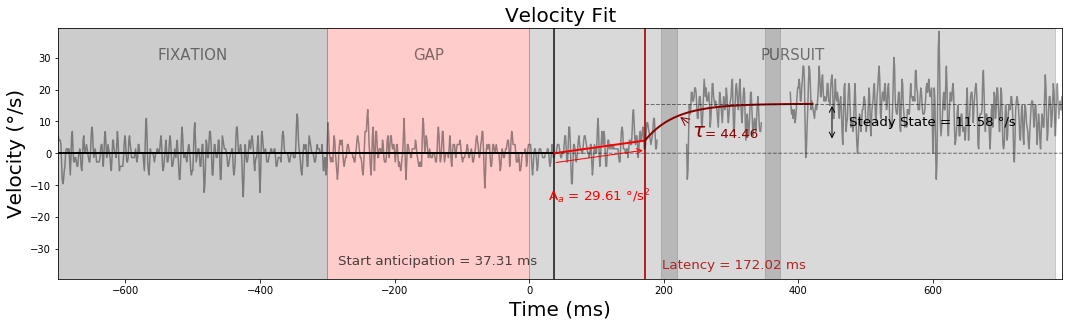

In [27]:
fig, axs = Plot.plot_fit(data=data, equation='fct_velocity', trials=trial, block=block, filt=None)

**position**

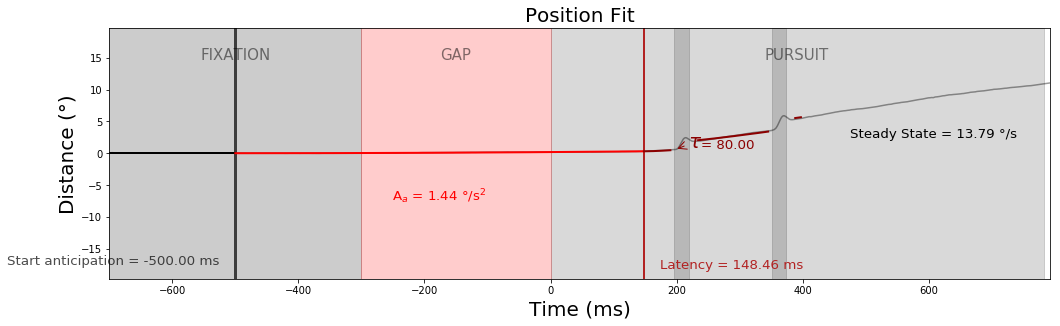

In [28]:
fig, axs = Plot.plot_fit(data=data, equation='fct_position', trials=trial, block=block, filt=None)

**saccade**

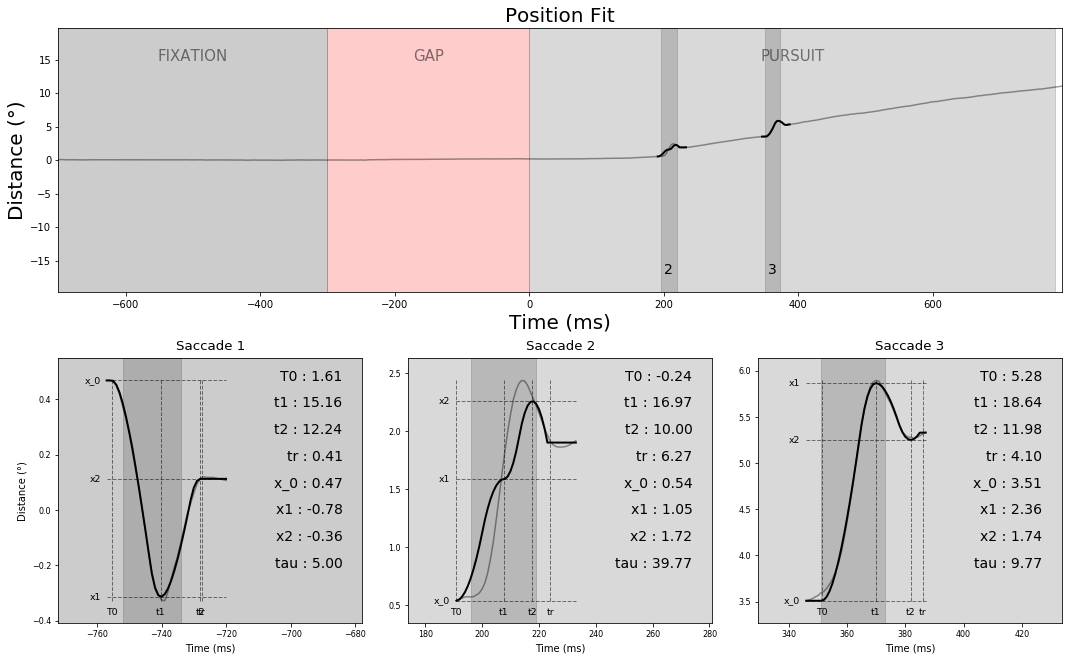

In [29]:
fig, axs = Plot.plot_fit(data=data, equation='fct_saccade', trials=trial, block=block, filt=None)

## Full

### Fit

In [30]:
import pickle

**velocity**

In [31]:
param = Fit.Fit_full(data=data, equation='fct_velocity', plot=True,
                     N_blocks=param_exp['N_blocks'], N_trials=param_exp['N_trials'],
                     filt=None,
                     file_fig='_static/result/Fit_velocity')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_velocity', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_velocity.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_velocity', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_velocity
----------------------------------------------------
param fit saved in _static/result/param_Fit_velocity


**position**

In [32]:
param = Fit.Fit_full(data=data, equation='fct_position', plot=True,
                     N_blocks=param_exp['N_blocks'], N_trials=param_exp['N_trials'],
                     filt=None,
                     file_fig='_static/result/Fit_position')
    
    
print('-'*47, '\n', 'figure fit saved in _static/result/Fit_position', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_position.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*52, '\n', 'param fit saved in _static/result/param_Fit_position', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
-----------------------------------------------
figure fit saved in _static/result/Fit_position
----------------------------------------------------
param fit saved in _static/result/param_Fit_position


**saccade**

In [33]:
param = Fit.Fit_full(data=data, equation='fct_saccade', plot=True,
                     N_blocks=param_exp['N_blocks'], N_trials=param_exp['N_trials'],
                     filt=None,
                     file_fig='_static/result/Fit_saccade')
    
    
print('-'*46, '\n', 'figure fit saved in _static/result/Fit_saccade', sep='')

# saves the fit parameters
with open('_static/result/param_Fit_saccade.pkl', 'wb') as fichier:
    f = pickle.Pickler(fichier)
    f.dump(param)
print('-'*51, '\n', 'param fit saved in _static/result/param_Fit_saccade', sep='')

block, trial =  0 0
block, trial =  0 1
block, trial =  1 0
block, trial =  1 1
----------------------------------------------
figure fit saved in _static/result/Fit_saccade
---------------------------------------------------
param fit saved in _static/result/param_Fit_saccade


## Retrieving the parameters

In [34]:
def Retrieving_param(data_show):
    with open('_static/result/param_Fit_%s.pkl'%data_show, 'rb') as fichier :
        param = pickle.load(fichier, encoding='latin1')
    
    print('\nParam recorded\n---------------\n')
    print(param.keys())
    
    print('\nFor the first trial\n---------------\n')
    for name in param.keys() :
        if name != 'fit' and name!='observer' :
            print(name, '=', param[name][block][trial])

**velocity**

In [35]:
Retrieving_param('velocity')


Param recorded
---------------

dict_keys(['fit', 'old_anti', 'maxi', 'old_latency', 'old_max', 'tau', 'a_anti', 'latency', 'start_anti', 'observer'])

For the first trial
---------------

old_anti = -1.3691850291970993
maxi = 11.575522298774453
old_latency = nan
old_max = 15.964697440438167
tau = 44.46237986617848
a_anti = 29.60507534268035
latency = 172.0243437211359
start_anti = 37.30796543958502


**position**

In [36]:
Retrieving_param('position')


Param recorded
---------------

dict_keys(['fit', 'old_anti', 'maxi', 'old_latency', 'old_max', 'tau', 'a_anti', 'latency', 'start_anti', 'observer'])

For the first trial
---------------

old_anti = -1.3691850291970993
maxi = 13.78802850709372
old_latency = nan
old_max = 15.964697440438167
tau = 79.99999998314709
a_anti = 1.4408621174132605
latency = 148.45772362188427
start_anti = -499.9999999247895


**saccade**

In [37]:
Retrieving_param('saccade')


Param recorded
---------------

dict_keys(['fit', 't1', 'x_0', 't2', 'x2', 'tau', 'T0', 'x1', 'observer', 'tr'])

For the first trial
---------------

t1 = [15.16276130486827, 16.96637070499535, 18.63972853153373]
x_0 = [0.46855696355797183, 0.5396706820719184, 3.5089493230647104]
t2 = [12.235688420693895, 10.004496240964688, 11.975185769162906]
x2 = [-0.3560474250618597, 1.7216828177047994, 1.7401891168262225]
tau = [5.000009050719314, 39.77154744933177, 9.76791449789115]
T0 = [1.6132224303592757, -0.23661991258591542, 5.283216003115783]
x1 = [-0.7829317681654278, 1.049446192397463, 2.3550376614679625]
tr = [0.40741936662850115, 6.26575283192556, 4.101861455973224]
